In [2]:
import numpy as np
N = 16
fs = 48e3   # 48 KHz
ts = 1/fs
n = np.arange(N)

In [3]:
a = 0.5*np.cos(2*np.pi*3e3*n*ts + np.pi/4)
b = np.cos(2*np.pi*9e3*n*ts)

In [6]:
x = np.around(a+b, 4)
for i in range(0, N):
    print(''.join(['x(', str(i), ') = ', str(x[i])]))

x(0) = 1.3536
x(1) = 0.574
x(2) = -0.7071
x(3) = -1.1152
x(4) = -0.3536
x(5) = 0.4619
x(6) = 0.2071
x(7) = -0.8446
x(8) = -1.3536
x(9) = -0.574
x(10) = 0.7071
x(11) = 1.1152
x(12) = 0.3536
x(13) = -0.4619
x(14) = -0.2071
x(15) = 0.8446


In [15]:
import matplotlib.pyplot as plt

def stem_plot(x, y, title, xlabel, ylabel, xticks=None, yticks=None, figsize=(6,3), subplot=(1,1), bottom=None, style=None):
    fig=plt.figure(figsize=figsize)
    for idx, value in enumerate(y):
        axes = fig.add_subplot(subplot[0], subplot[1], idx+1)
        if bottom is not None:
            axes.stem(x[idx], y[idx], bottom=bottom[idx])
        else:
            axes.stem(x[idx], y[idx])
        if style is not None:
            if style[idx] == 'dashed':
                axes.plot(x[idx], y[idx], linestyle='dashed')
        axes.grid(True, which='major')
        if xticks is not None:
            axes.set_xticks(xticks[idx])
        if yticks is not None:
            axes.set_yticks(yticks[idx])
        axes.set_title(title[idx])
        axes.set_xlabel(xlabel[idx])
        axes.set_ylabel(ylabel[idx])
        plt.box(True)

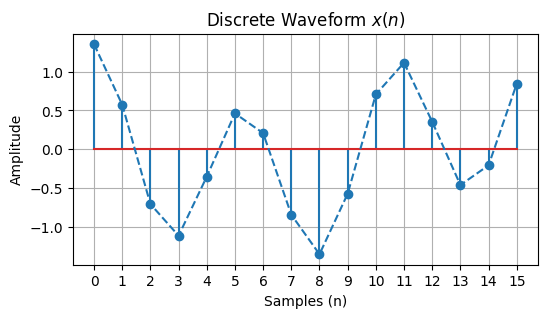

In [16]:
stem_plot(x      = [n],
          y      = [x],
          xticks = [n], 
          figsize= (6, 3),
          title  = ["Discrete Waveform $x(n)$"], 
          style  = ["dashed"], 
          xlabel = ["Samples (n)"], 
          ylabel = ["Amplitude"])

### DFT

In [18]:
def dft(x):
    N = np.size(x)
    X= np.zeros(N, dtype=np.complex64)
    n = np.arange(0, N)
    for k in range(N):
        X[k] = np.sum(x*np.exp(-2j*np.pi*k*n/N))
    return X

In [19]:
X = np.round(dft(x), 2) + (0.0 + 0.0j) # Add 0.0+0.0j to remove -0.0-0.0j
for i in range(N):
    print(''.join(['X(',str(i),') = ',str(X[i])]))

X(0) = 0j
X(1) = (2.83+2.83j)
X(2) = 0j
X(3) = (8+0j)
X(4) = 0j
X(5) = 0j
X(6) = 0j
X(7) = 0j
X(8) = 0j
X(9) = 0j
X(10) = 0j
X(11) = 0j
X(12) = 0j
X(13) = (8+0j)
X(14) = 0j
X(15) = (2.83-2.83j)


In [22]:
Xm = np.round(np.abs(X), 2)

In [23]:
Xp = np.round(np.angle(X, deg=True), 2)

In [24]:
for i in range(0, N):
    print(''.join(['X(',str(i),') = ',str(Xm[i]),' ∠ ',str(Xp[i]),'°']))

X(0) = 0.0 ∠ 0.0°
X(1) = 4.0 ∠ 45.0°
X(2) = 0.0 ∠ 0.0°
X(3) = 8.0 ∠ 0.0°
X(4) = 0.0 ∠ 0.0°
X(5) = 0.0 ∠ 0.0°
X(6) = 0.0 ∠ 0.0°
X(7) = 0.0 ∠ 0.0°
X(8) = 0.0 ∠ 0.0°
X(9) = 0.0 ∠ 0.0°
X(10) = 0.0 ∠ 0.0°
X(11) = 0.0 ∠ 0.0°
X(12) = 0.0 ∠ 0.0°
X(13) = 8.0 ∠ 0.0°
X(14) = 0.0 ∠ 0.0°
X(15) = 4.0 ∠ -45.0°


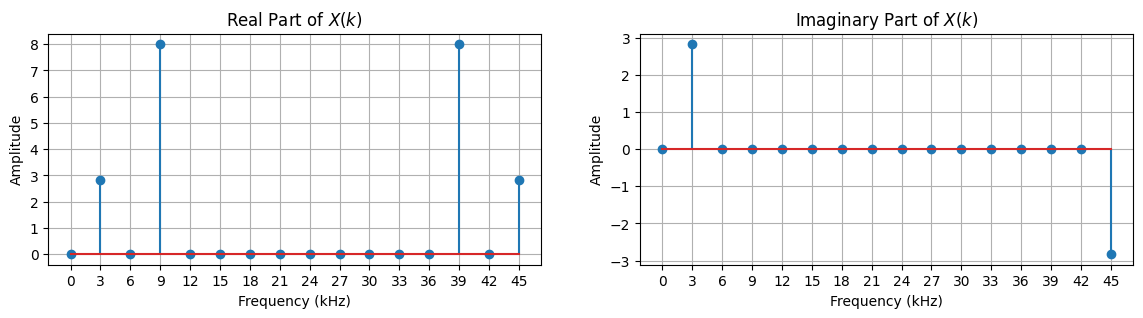

In [20]:
stem_plot(x      = [n*(fs/N)/1e3, n*(fs/N)/1e3],
          y      = [np.real(X), np.imag(X)],
          yticks = [np.arange(0, 9), np.arange(-3, 4)],
          figsize= (14, 3),
          xticks = [n*(fs/N)/1e3, n*(fs/N)/1e3], 
          subplot= (1, 2),
          title  = ["Real Part of $X(k)$", "Imaginary Part of $X(k)$"],
          xlabel = ["Frequency (kHz)", "Frequency (kHz)"], 
          ylabel = ["Amplitude", "Amplitude"])

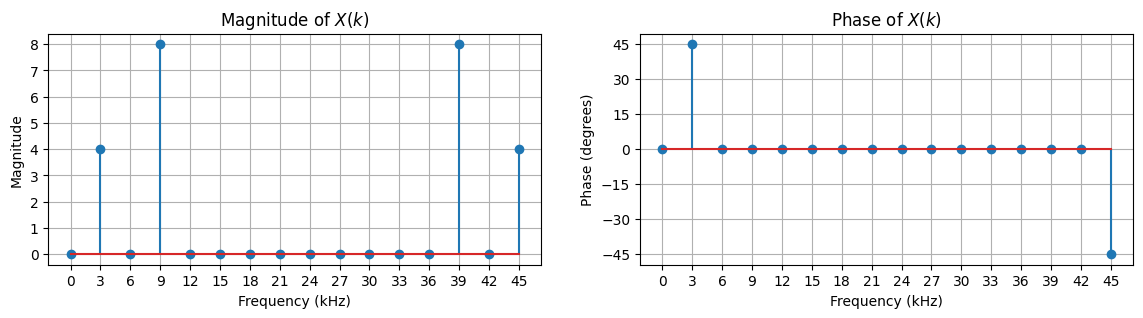

In [25]:
stem_plot(x      = [n*(fs/N)/1e3, n*(fs/N)/1e3],
          y      = [Xm, Xp],
          yticks = [np.arange(0, 9), np.arange(-45, 60, 15)],
          figsize= (14, 3),
          xticks = [n*(fs/N)/1e3, n*(fs/N)/1e3], 
          subplot= (1, 2),
          title  = ["Magnitude of $X(k)$", "Phase of $X(k)$"],
          xlabel = ["Frequency (kHz)", "Frequency (kHz)"], 
          ylabel = ["Magnitude", "Phase (degrees)"])

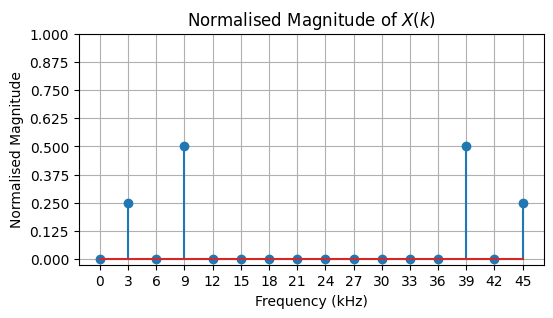

In [26]:
Xnorm = (Xm/N)

stem_plot(x      = [n*(fs/N)/1e3],
          y      = [Xnorm],
          figsize= (6, 3),
          yticks = [np.arange(0, 1.125, 0.125)],
          xticks = [n*(fs/N)/1e3],
          title  = ["Normalised Magnitude of $X(k)$"],
          xlabel = ["Frequency (kHz)"], 
          ylabel = ["Normalised Magnitude"])